In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

2023-02-08 00:49:39.795751: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 00:49:40.195353: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-08 00:49:40.250207: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-08 00:49:40.250290: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

4422102/4422102 [==============================] - 2s 0us/step


In [2]:
print(X_train.shape)
print(X_train.dtype)

(55000, 28, 28)
uint8


In [3]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [6]:
y_train.dtype

dtype('uint8')

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-02-08 01:00:17.847338: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-08 01:00:17.847801: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-08 01:00:17.847830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (NRD5CG2231NCW): /proc/driver/nvidia/version does not exist
2023-02-08 01:00:17.849128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7015 - accuracy: 0.7682 - val_loss: 0.5041 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4868 - accuracy: 0.8303 - val_loss: 0.4586 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4422 - accuracy: 0.8446 - val_loss: 0.4241 - val_accuracy: 0.8482
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4183 - accuracy: 0.8536 - val_loss: 0.3957 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3976 - accuracy: 0.8602 - val_loss: 0.3956 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3811 - accuracy: 0.8654 - val_loss: 0.3967 - val_accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3684 - accuracy: 0.8689 - val_loss: 0.3730 - val_accuracy:

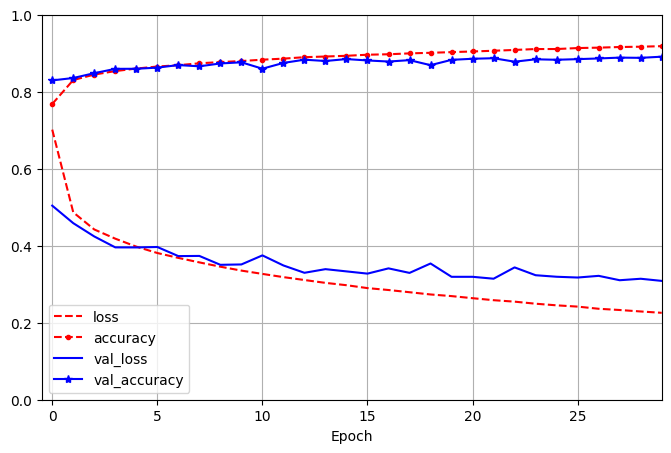

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[-0.5, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8855


[0.3232579827308655, 0.8855000138282776]

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

1/1 [==============================] - 0s 71ms/step
[[0.   0.   0.   0.   0.   0.01 0.   0.02 0.   0.97]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [17]:
import numpy as np

y_pred = y_proba.argmax(axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')